In [33]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
#Data Read
df_istanbul = pd.read_csv('/Users/iremn/PythonClass/Spiced/Personal_Projects/Weather/ECA_blended_custom/TG_STAID000248.txt', header = 14)

In [42]:
df_istanbul.columns = ['Source ID', 'Date', 'Mean Temp*10', 'Qual']

In [43]:
df_istanbul['Date'] = pd.to_datetime(df_istanbul['Date'], format="%Y%m%d")

In [44]:
#New DF from Suspect
df_istanbul_suspect = df_istanbul[df_istanbul['Qual'] == 1]


In [45]:
#Remove data Qual = 9
df_istanbul = df_istanbul[df_istanbul['Qual'] != 9]


In [47]:
df_istanbul['Real_temp'] = df_istanbul['Mean Temp*10']/10

In [48]:
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp
0,101231,1929-01-01,126,0,12.6
1,101231,1929-01-02,133,0,13.3
2,101231,1929-01-03,131,0,13.1
3,101231,1929-01-04,118,0,11.8
4,101231,1929-01-05,106,0,10.6


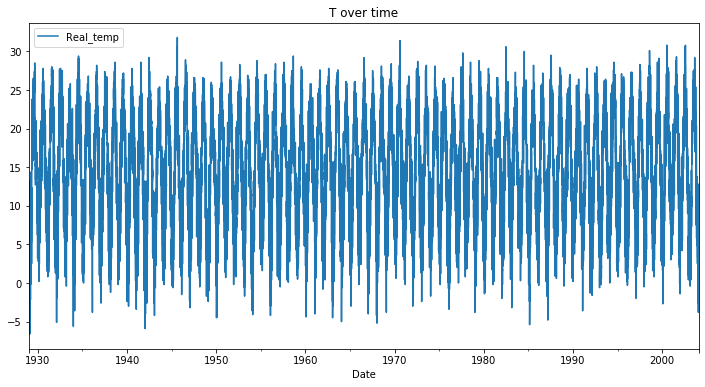

In [51]:
#Plot
df_istanbul.plot(x = 'Date', y= 'Real_temp', figsize=(12,6), title='T over time')


# De-trend this 

In [52]:
#Linear
df_istanbul['lin_difference'] = df_istanbul['Real_temp'].diff()
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference
0,101231,1929-01-01,126,0,12.6,NaN
1,101231,1929-01-02,133,0,13.3,0.7
2,101231,1929-01-03,131,0,13.1,-0.2
3,101231,1929-01-04,118,0,11.8,-1.3
4,101231,1929-01-05,106,0,10.6,-1.2


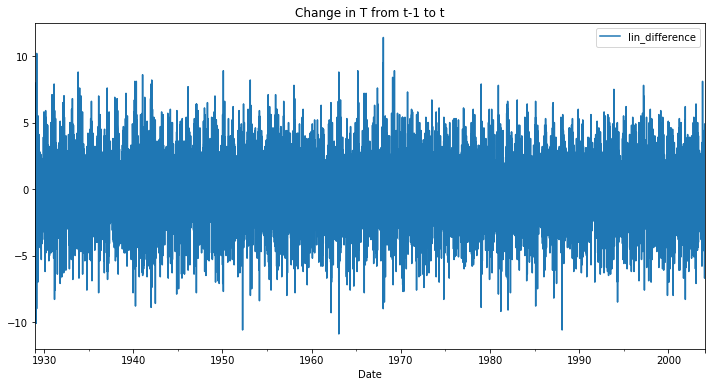

In [54]:
df_istanbul.plot(x = 'Date', y= 'lin_difference',figsize=(12,6), title='Change in T from t-1 to t')
plt.show()

In [56]:
#Check if it is linear
df_istanbul['lin_difference'].mean() # so it is linear - there is no exponential increase

-0.00029172592349487807

# By rolling mean #

In [57]:
df_istanbul['rolling_mean'] = df_istanbul['Real_temp'].rolling(365, center=True).mean()
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean
0,101231,1929-01-01,126,0,12.6,NaN,NaN
1,101231,1929-01-02,133,0,13.3,0.7,NaN
2,101231,1929-01-03,131,0,13.1,-0.2,NaN
3,101231,1929-01-04,118,0,11.8,-1.3,NaN
4,101231,1929-01-05,106,0,10.6,-1.2,NaN


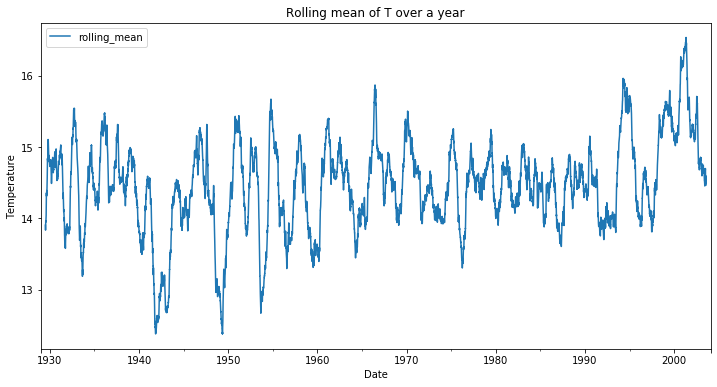

In [58]:
df_istanbul.plot(x = 'Date', y= 'rolling_mean', figsize=(12, 6))
plt.title('Rolling mean of T over a year')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

In [61]:
df_istanbul['de-trended'] = df_istanbul['Real_temp'] - df_istanbul['rolling_mean']
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean,de-trended
0,101231,1929-01-01,126,0,12.6,NaN,NaN,NaN
1,101231,1929-01-02,133,0,13.3,0.7,NaN,NaN
2,101231,1929-01-03,131,0,13.1,-0.2,NaN,NaN
3,101231,1929-01-04,118,0,11.8,-1.3,NaN,NaN
4,101231,1929-01-05,106,0,10.6,-1.2,NaN,NaN


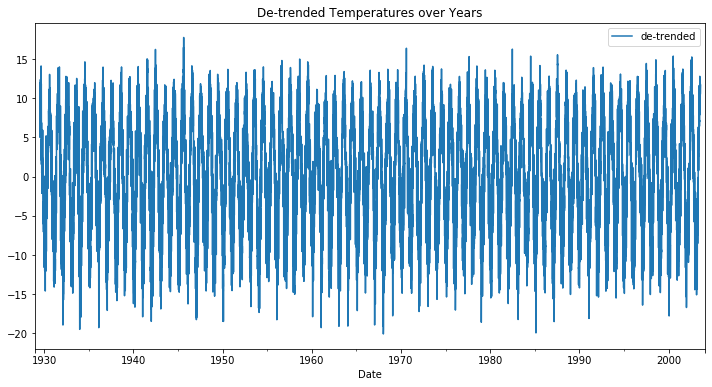

In [63]:
#Plot
df_istanbul.plot(x = 'Date', y= 'de-trended',figsize=(12,6), title='De-trended Temperatures over Years')

# Remove change in volatility if any

In [65]:
df_istanbul['log_y'] = np.log(df_istanbul['Real_temp'])
df_istanbul['log_diff'] = df_istanbul.log_y.diff()
df_istanbul.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean,de-trended,log_y,log_diff
0,101231,1929-01-01,126,0,12.6,NaN,NaN,NaN,2.533697,NaN
1,101231,1929-01-02,133,0,13.3,0.7,NaN,NaN,2.587764,0.054067
2,101231,1929-01-03,131,0,13.1,-0.2,NaN,NaN,2.572612,-0.015152
3,101231,1929-01-04,118,0,11.8,-1.3,NaN,NaN,2.468100,-0.104513
4,101231,1929-01-05,106,0,10.6,-1.2,NaN,NaN,2.360854,-0.107246


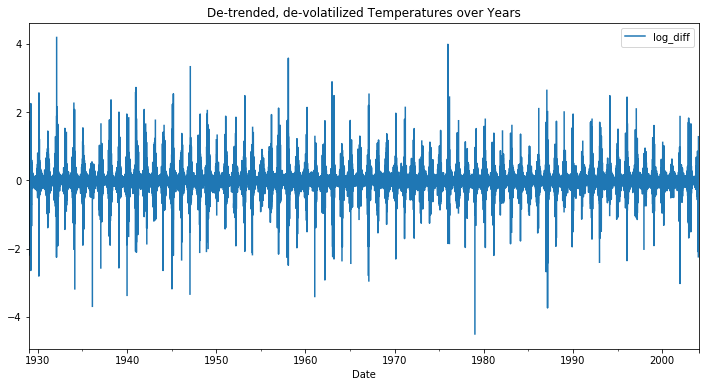

In [66]:
#Plot
df_istanbul.plot(x = 'Date', y= 'log_diff',figsize=(12,6), title='De-trended, de-volatilized Temperatures over Years')

In [67]:
#Make a month column

In [76]:
df_istanbul['Month'] = df_istanbul['Date'].dt.month

# Take out the seasonality by grouping in months 

In [77]:
df_istanbul['monthly_mean'] = df_istanbul.groupby('Month')['log_diff'].transform('mean')


In [79]:
df_istanbul['de-seasonalized'] = df_istanbul['log_diff'] - df_istanbul['monthly_mean']

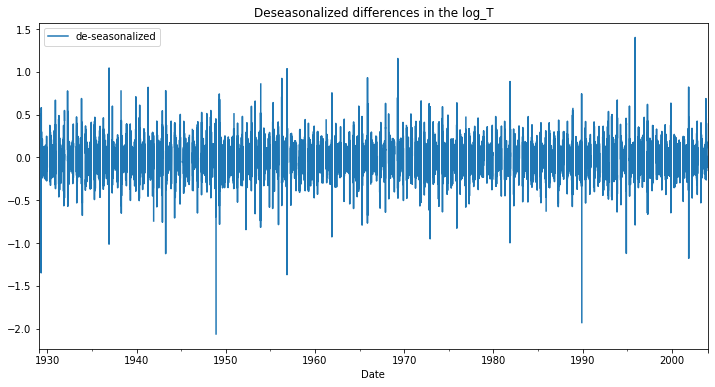

In [80]:
df_istanbul.plot(x='Date', y ='de-seasonalized', figsize=(12,6), title='Deseasonalized differences in the log_T')

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [83]:
df_istanbul_reind = df_istanbul.set_index('Date')

Figure(432x288)


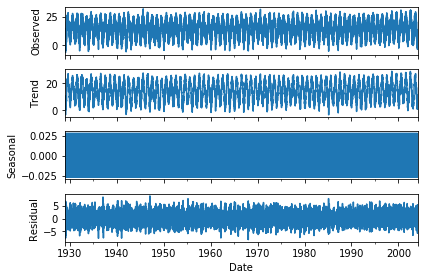

In [85]:
decompose = seasonal_decompose(df_istanbul_reind['Real_temp'], model='additive')
print(decompose.plot())

# Is it centeralized around normal? (ie zero and a symmetric distribution) 

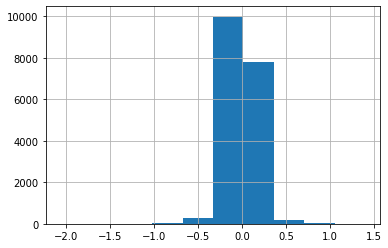

In [87]:
df_istanbul['de-seasonalized'].hist(bins=10)

### 1D heatmap 

In [93]:
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean,de-trended,log_y,log_diff,Month,monthly_mean,de-seasonalized,year
0,101231,1929-01-01,126,0,12.6,NaN,NaN,NaN,2.533697,NaN,1,NaN,NaN,1929
1,101231,1929-01-02,133,0,13.3,0.7,NaN,NaN,2.587764,0.054067,1,NaN,NaN,1929
2,101231,1929-01-03,131,0,13.1,-0.2,NaN,NaN,2.572612,-0.015152,1,NaN,NaN,1929
3,101231,1929-01-04,118,0,11.8,-1.3,NaN,NaN,2.468100,-0.104513,1,NaN,NaN,1929
4,101231,1929-01-05,106,0,10.6,-1.2,NaN,NaN,2.360854,-0.107246,1,NaN,NaN,1929


In [94]:
df_istanbul['year'] = df_istanbul['Date'].dt.year

In [97]:
year_mean = df_istanbul.groupby('year')['Real_temp'].mean()

In [98]:
year_mean

year
1929    13.904110
1930    14.788493
1931    14.329041
1932    15.054372
1933    13.490685
1934    14.835890
1935    14.305753
1936    14.811475
1937    15.113973
1938    14.315616
1939    14.736712
1940    13.534973
1941    13.748767
1942    13.072055
1943    13.503836
1944    14.304098
1945    14.048219
1946    14.952329
1947    14.566301
1948    13.513661
1949    13.286027
1950    14.455342
1951    14.746575
1952    14.923224
1953    13.529589
1954    14.240274
1955    14.948493
1956    13.530055
1957    14.470411
1958    14.691233
          ...    
1975    14.767397
1976    13.725956
1977    14.654795
1978    14.486575
1979    15.095890
1980    14.218852
1981    14.629863
1982    14.286575
1983    14.443014
1984    14.693443
1985    13.957534
1986    14.596712
1987    13.941644
1988    14.426503
1989    14.696164
1990    14.918356
1991    13.976986
1992    14.052459
1993    14.184658
1994    15.720274
1995    14.971507
1996    14.410656
1997    13.893699
1998    15.172877
1999 